In [2]:
%config IPCompleter.greedy=True
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [5]:
from sklearn.ensemble import BaggingClassifier 

bagging = BaggingClassifier(n_estimators=5)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=5,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

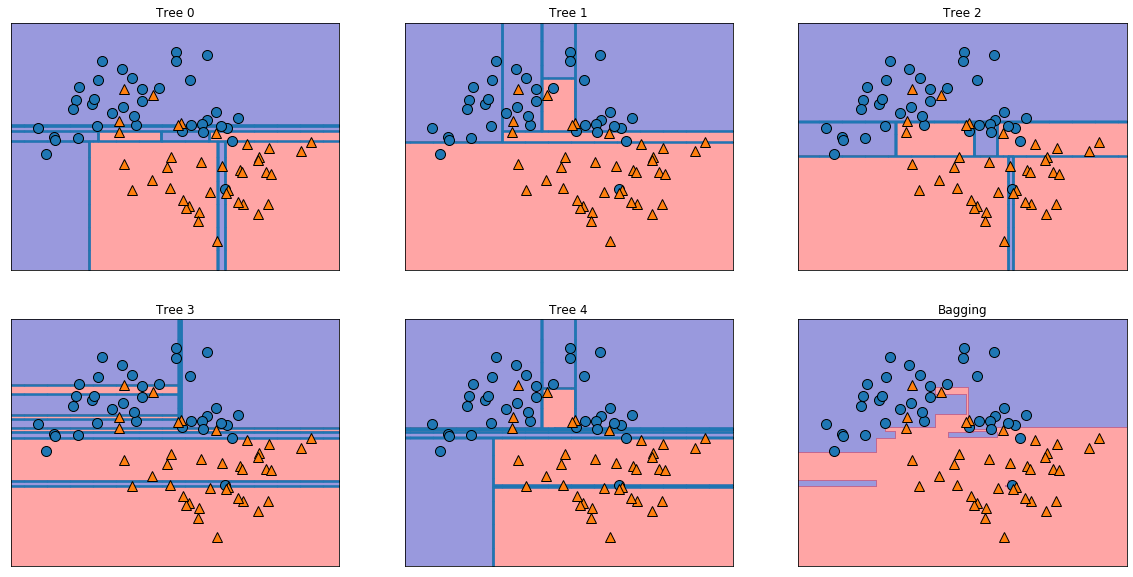

In [6]:
from mglearn.plot_interactive_tree import plot_tree_partition
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import discrete_scatter


fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    plot_tree_partition(X_train, y_train, tree, ax=ax)
plot_2d_separator(bagging, X_train, fill=True, ax=axes[-1, -1],
                                    alpha=.4)
axes[-1, -1].set_title("Bagging")
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)